# Importing the Dependecies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection and Processing

In [2]:
#loading the csv data to a pandas Dataframe
df=pd.read_csv("heart_disease_data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#info gives as information of loaded data in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#print last 5 rows of dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#Number of rows and columns in dataset
df.shape

(303, 14)

In [7]:
#checking the missing values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Data Analysis

In [8]:
#checking the distribution of Target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Data Visualization

1->Defective Heart


0->Healthy Heart

In [9]:
# Grouping by 'target' and calculating mean for each group
grouped_df = df.groupby('target').mean()
grouped_df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


<Axes: >

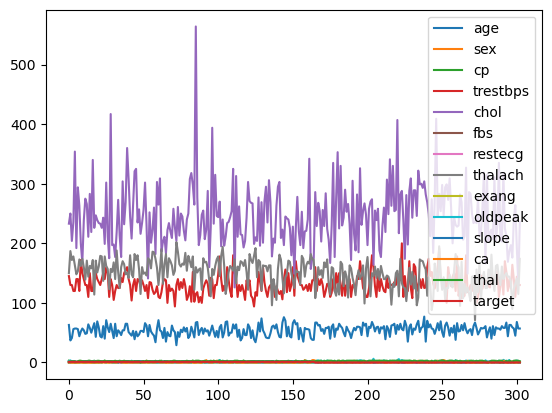

In [10]:
df.plot()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

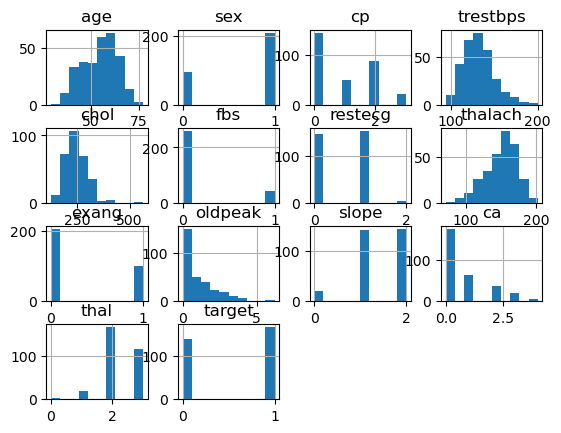

In [11]:
df.hist()

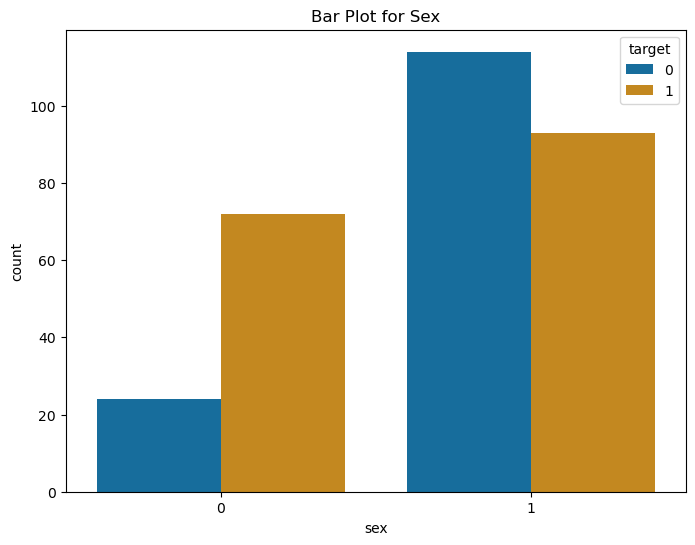

In [12]:
# Bar plot for a categorical column (e.g., 'sex')
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, hue='target', palette='colorblind')
plt.title('Bar Plot for Sex')
plt.show()

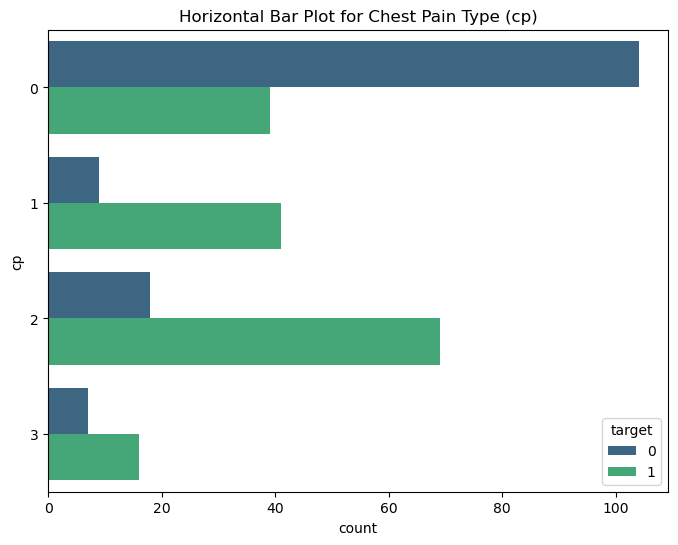

In [13]:
# Horizontal bar plot for another categorical column (e.g., 'cp')
plt.figure(figsize=(8, 6))
sns.countplot(y='cp', data=df, hue='target', palette='viridis')
plt.title('Horizontal Bar Plot for Chest Pain Type (cp)')
plt.show()

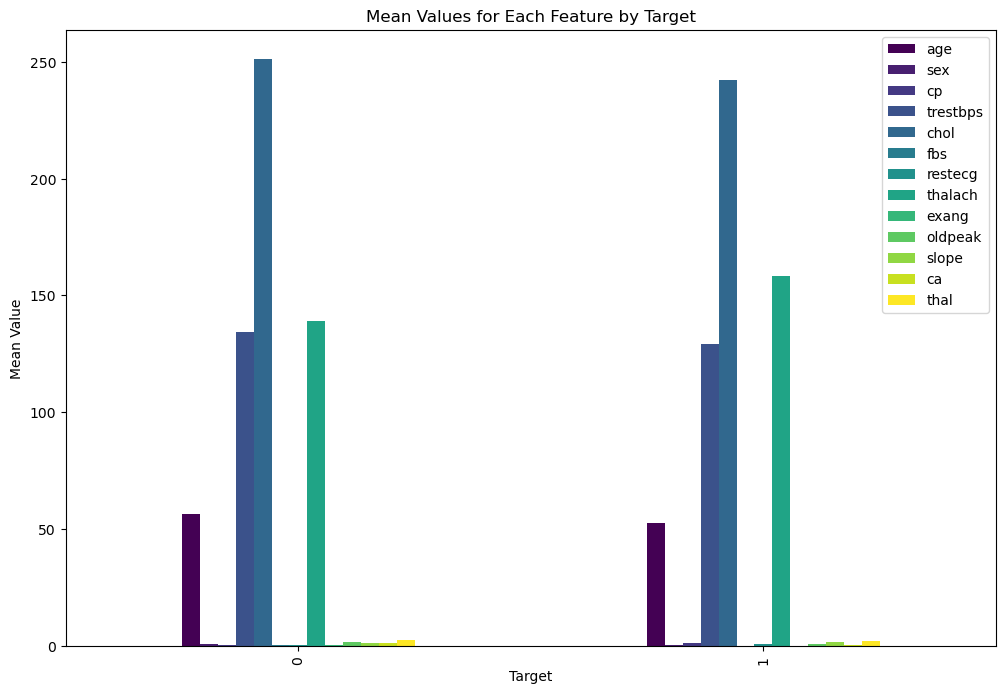

In [14]:
# Bar plot for grouped data
grouped_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Mean Values for Each Feature by Target')
plt.xlabel('Target')
plt.ylabel('Mean Value')
plt.show()

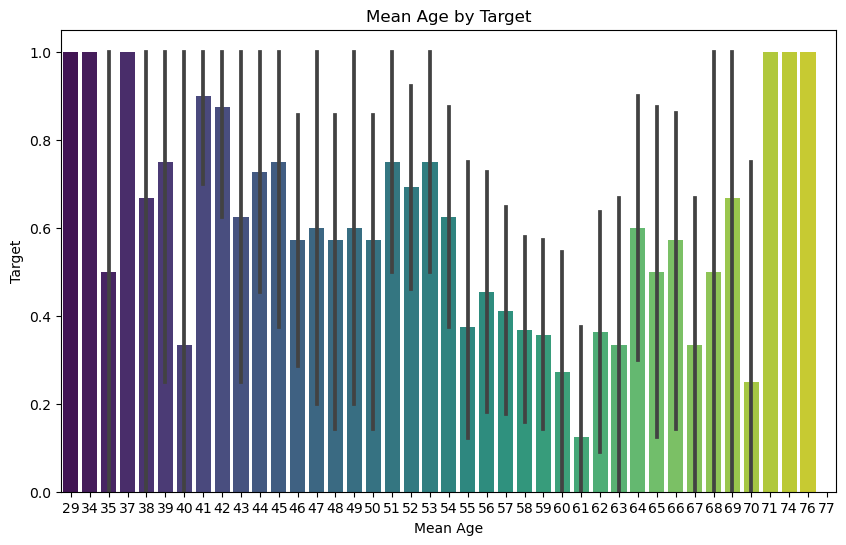

In [15]:
# Horizontal bar plot for another categorical column (e.g., 'cp')
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='target', data=df, palette='viridis')
plt.title('Mean Age by Target')
plt.xlabel('Mean Age')
plt.ylabel('Target')
plt.show()

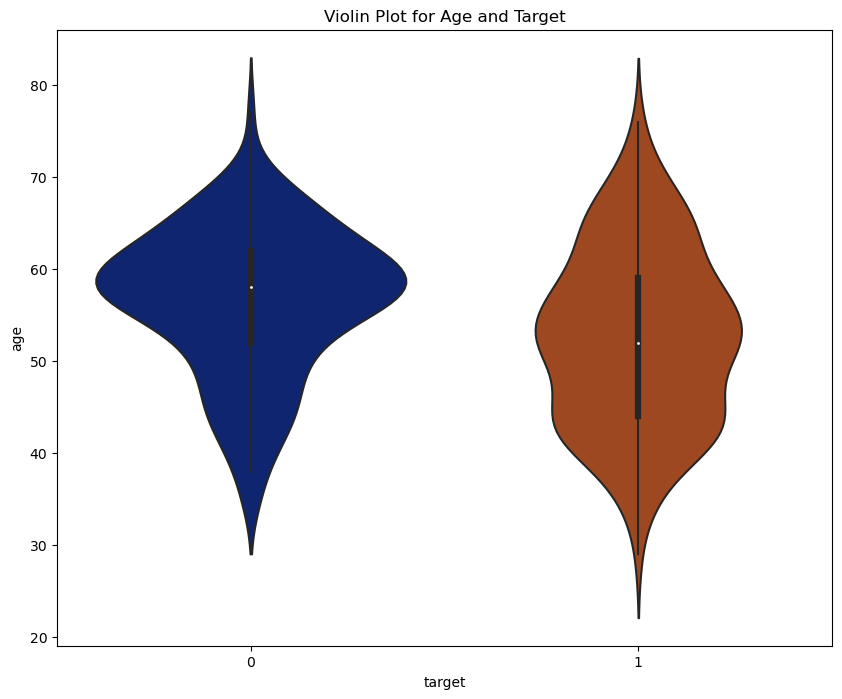

In [30]:
# Violin plot for a numerical and categorical column (e.g., 'age' and 'target')
plt.figure(figsize=(10, 8))
sns.violinplot(x='target', y='age', data=df, palette='dark')
plt.title('Violin Plot for Age and Target')
plt.show()

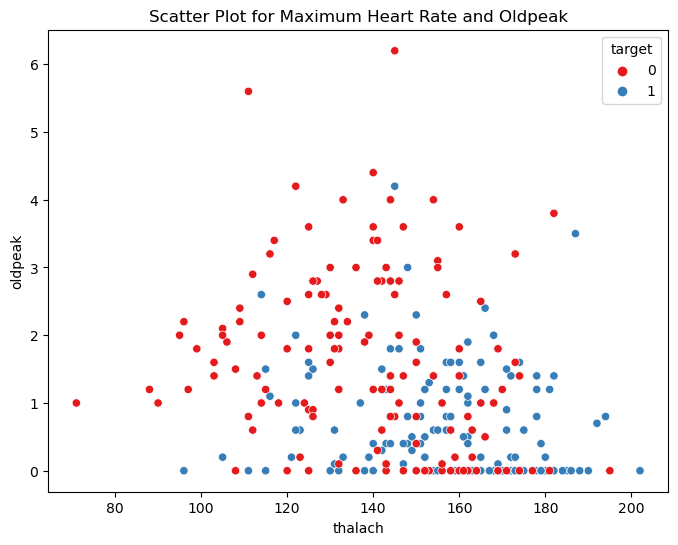

In [16]:
# Scatter plot for two numerical columns (e.g., 'thalach' and 'oldpeak')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='thalach', y='oldpeak', data=df, hue='target', palette='Set1')
plt.title('Scatter Plot for Maximum Heart Rate and Oldpeak')
plt.show()

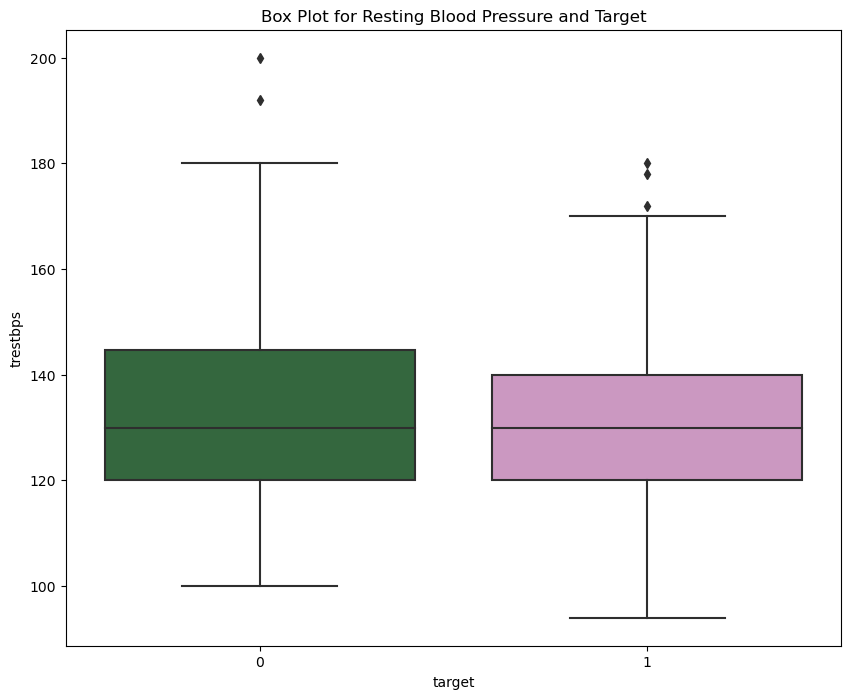

In [17]:
# Box plot for a numerical and categorical column (e.g., 'trestbps' and 'target')
plt.figure(figsize=(10, 8))
sns.boxplot(x='target', y='trestbps', data=df, palette="cubehelix")
plt.title('Box Plot for Resting Blood Pressure and Target')
plt.show()

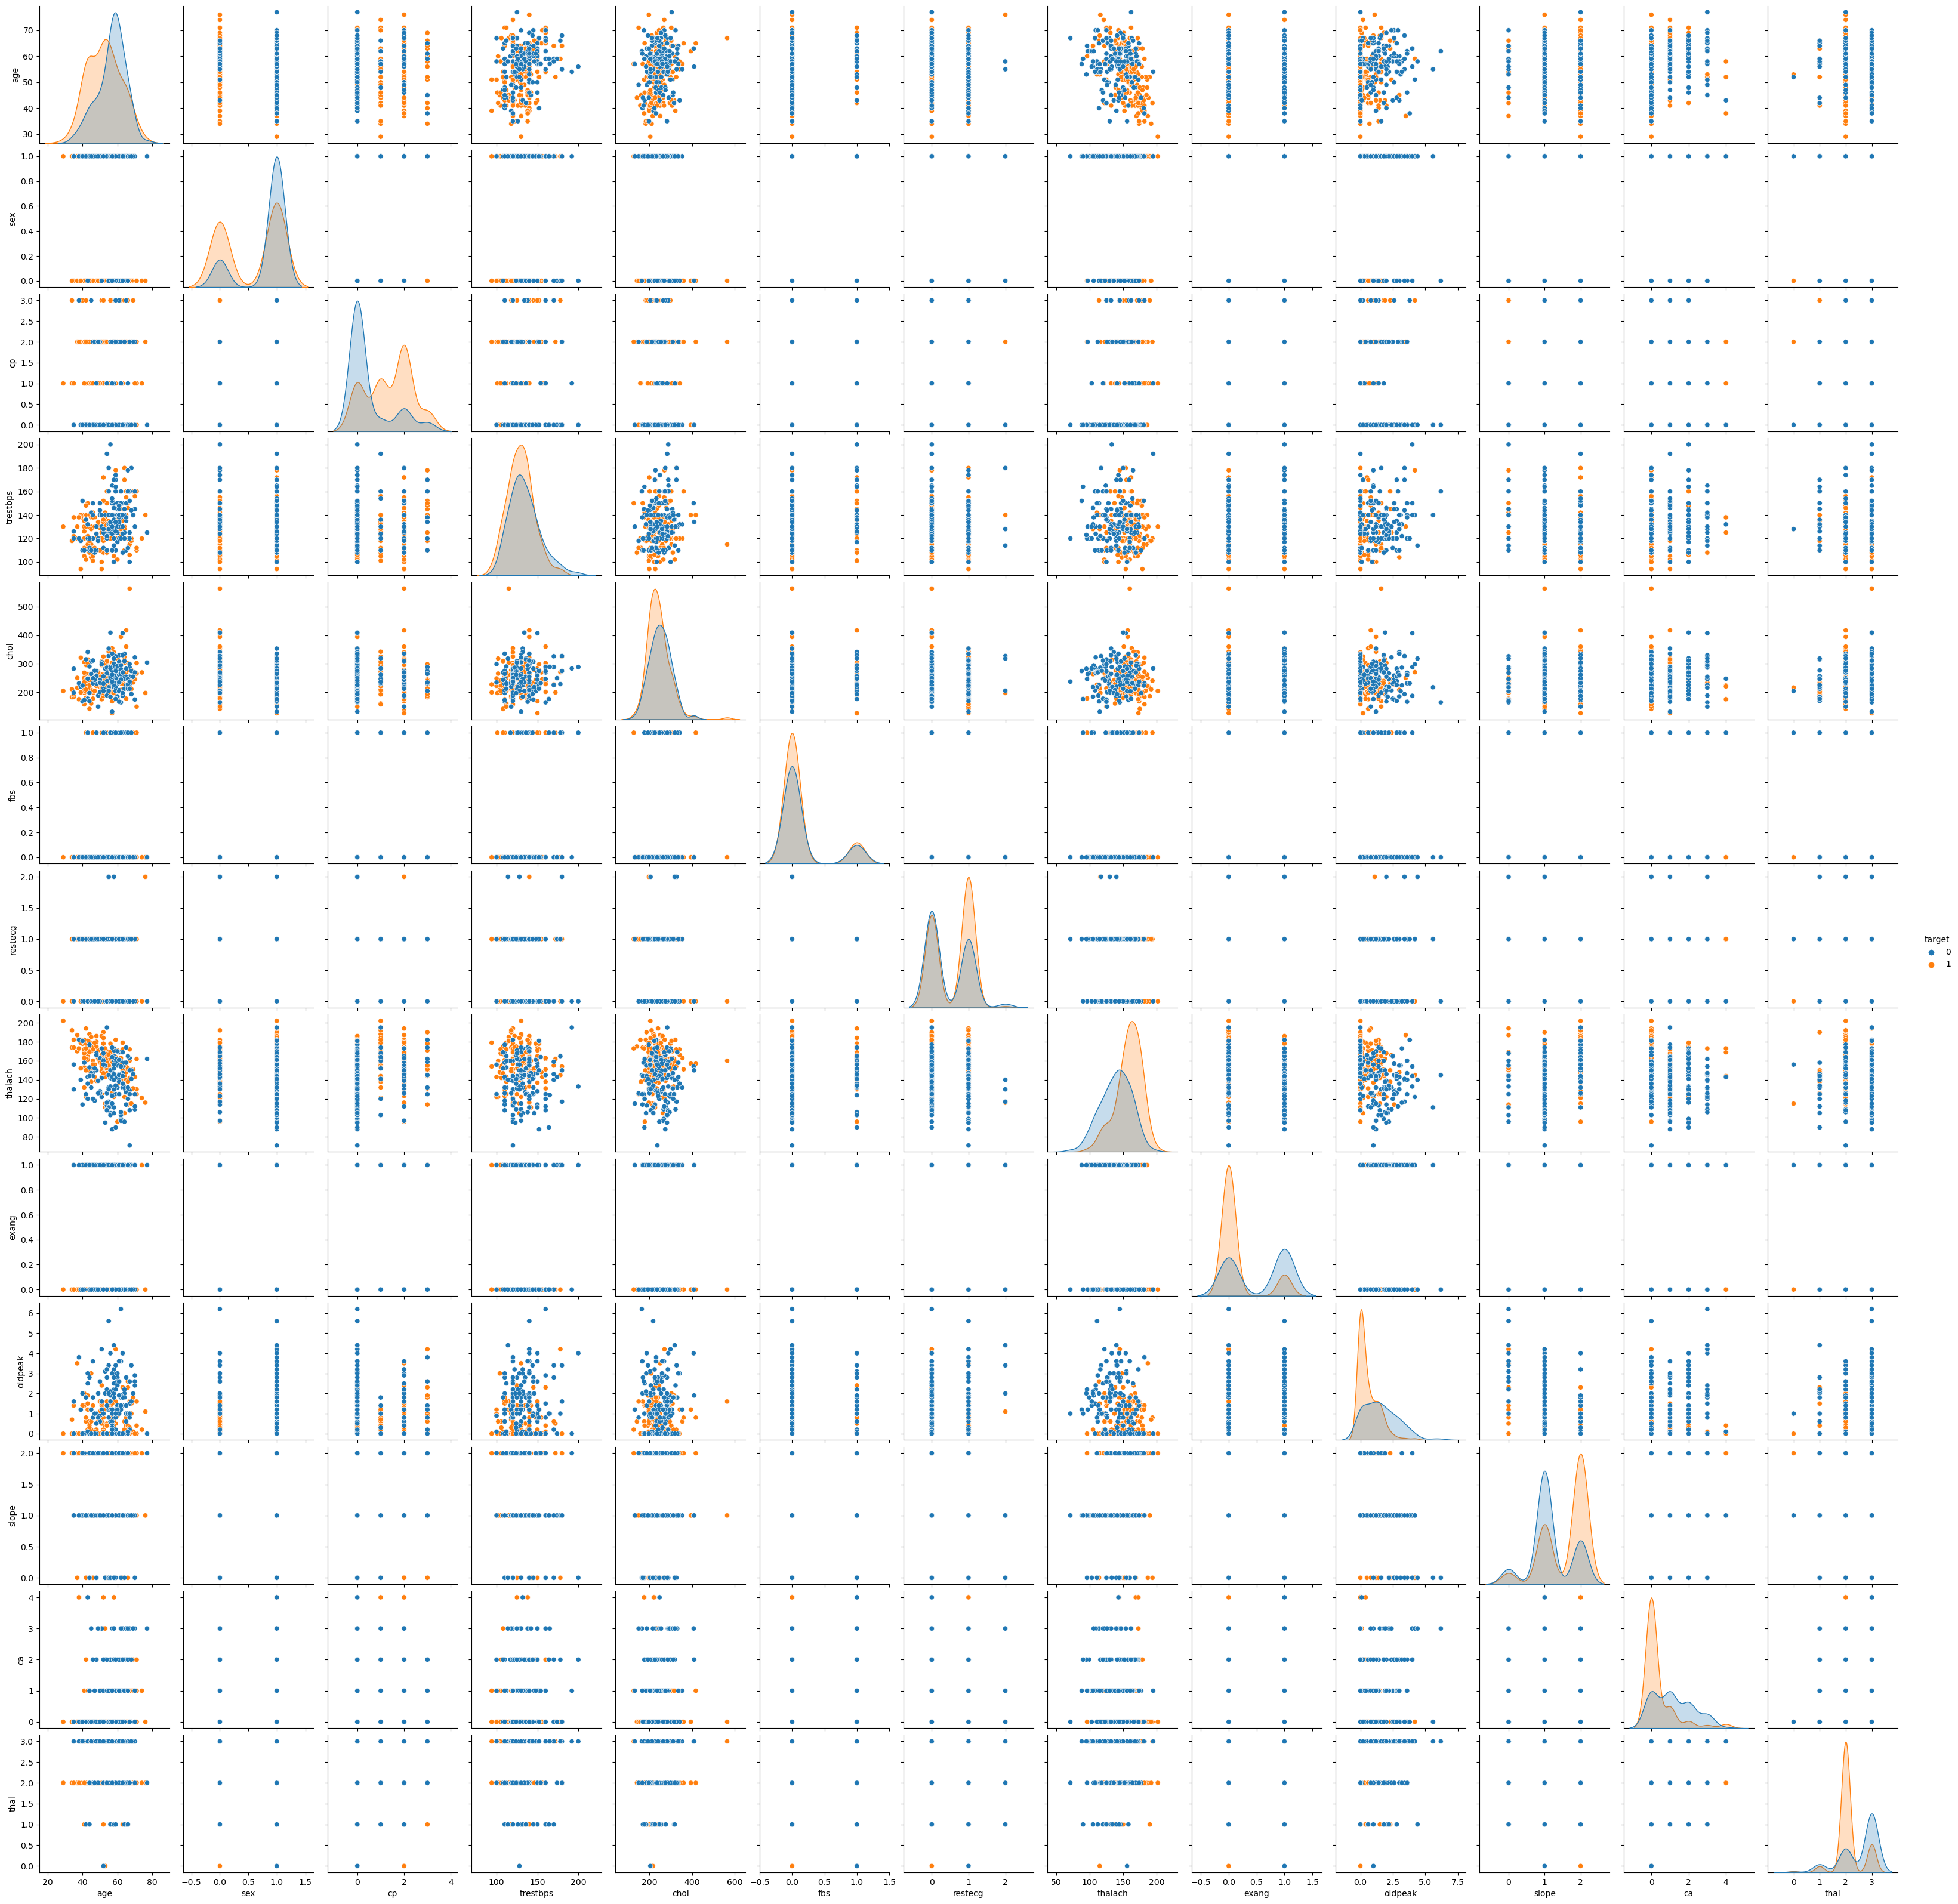

In [18]:
# Pairplot for numerical columns
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()


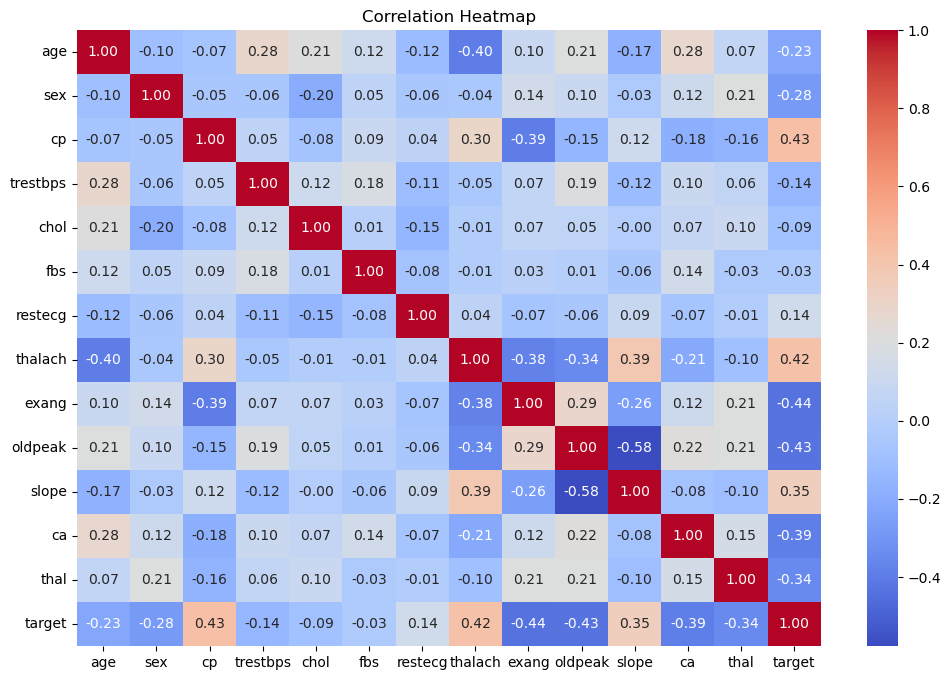

In [19]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

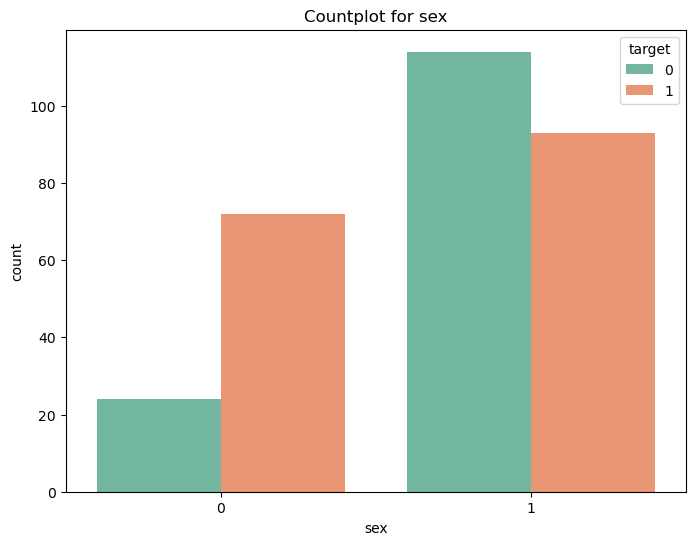

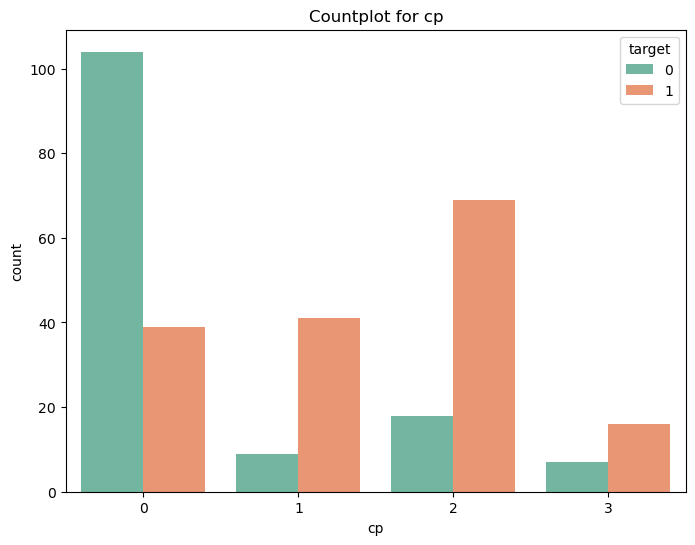

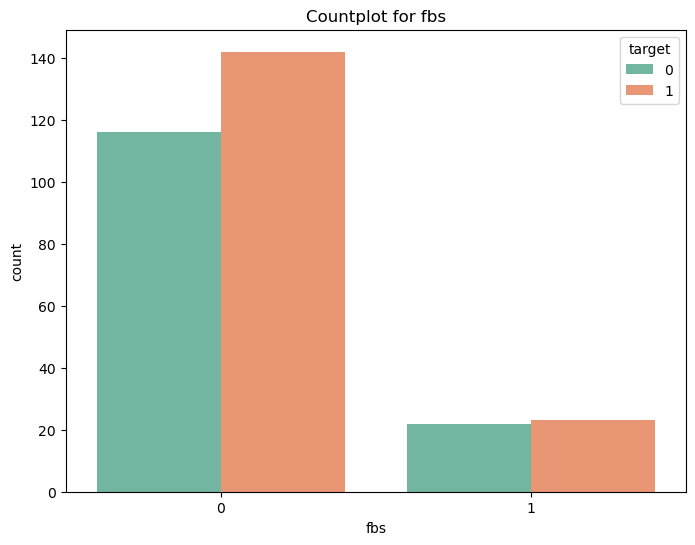

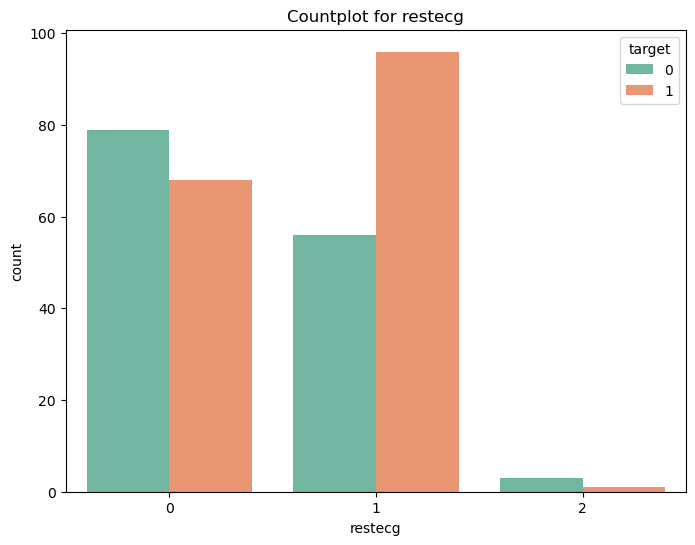

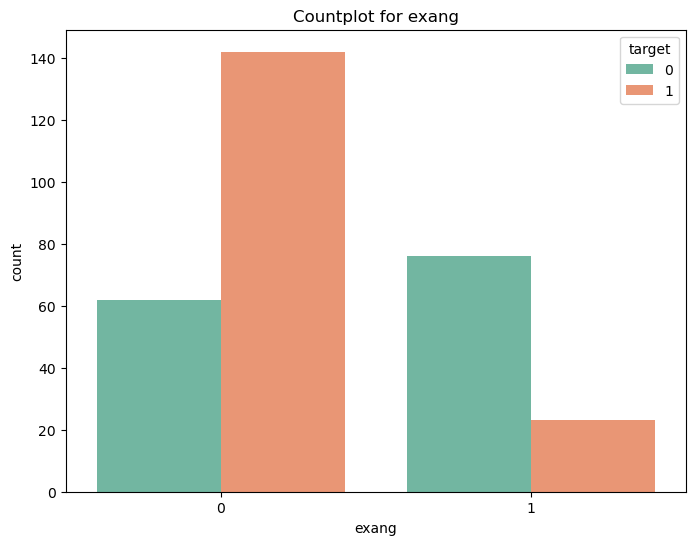

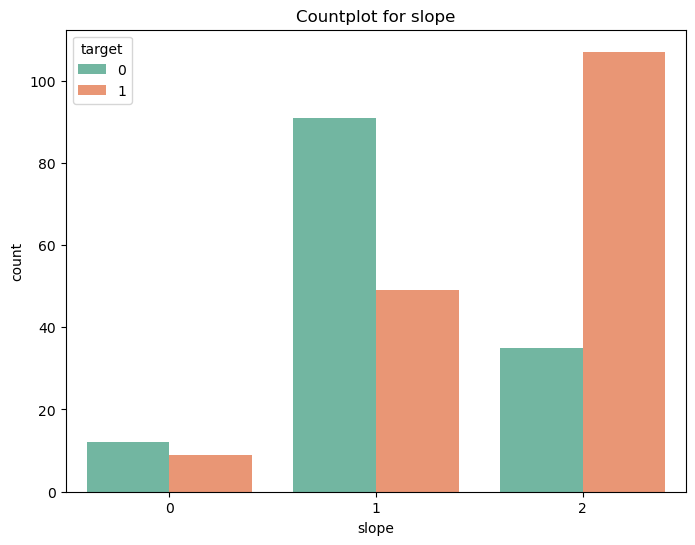

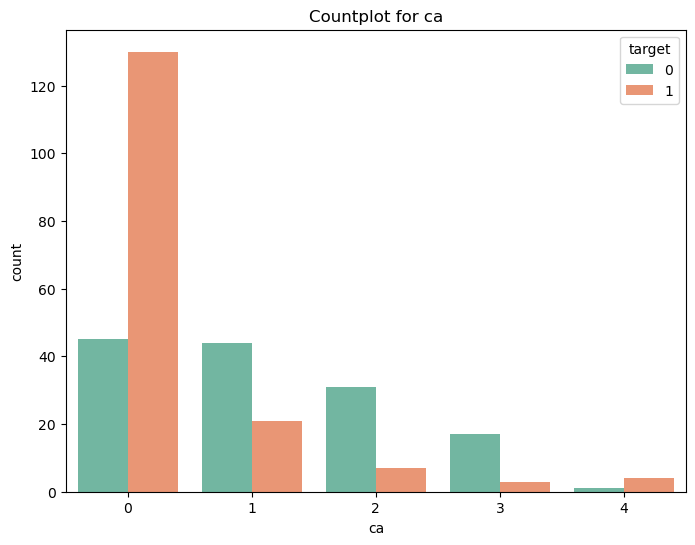

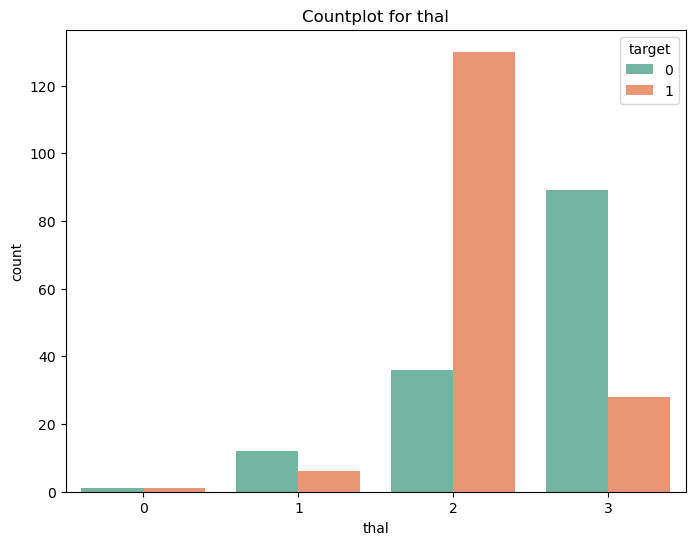

In [20]:
# Countplot for categorical columns (assuming 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' are categorical)
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, hue='target', palette='Set2')
    plt.title(f'Countplot for {column}')
    plt.show()

In [26]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [43]:
def create_pie_chart(column):
    # Define a custom list of colors
    custom_colors = ['blue', 'lightcoral', 'lightgreen', 'orange', 'lightpink']

    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', colors=custom_colors, startangle=90)
    plt.title(f'Pie Chart for {column}')
    plt.ylabel('')
    plt.show()

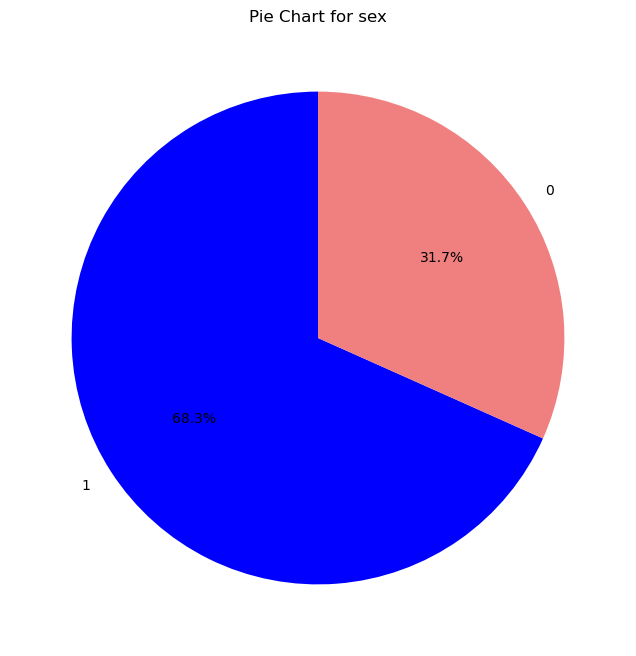

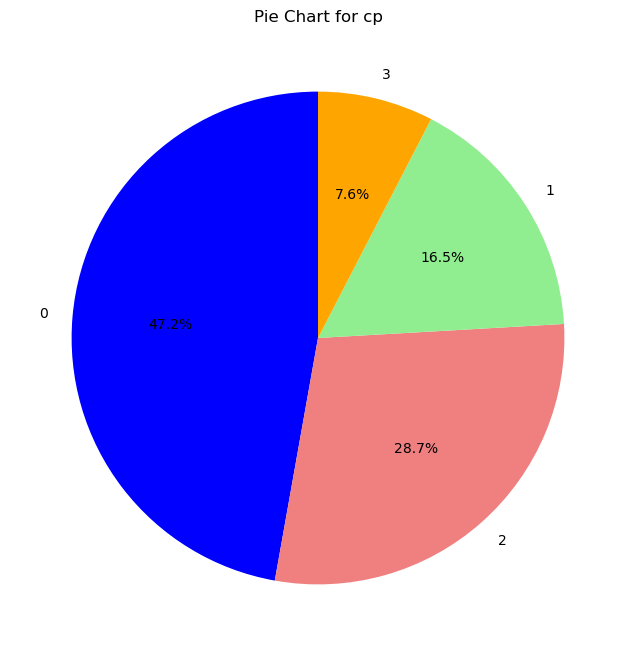

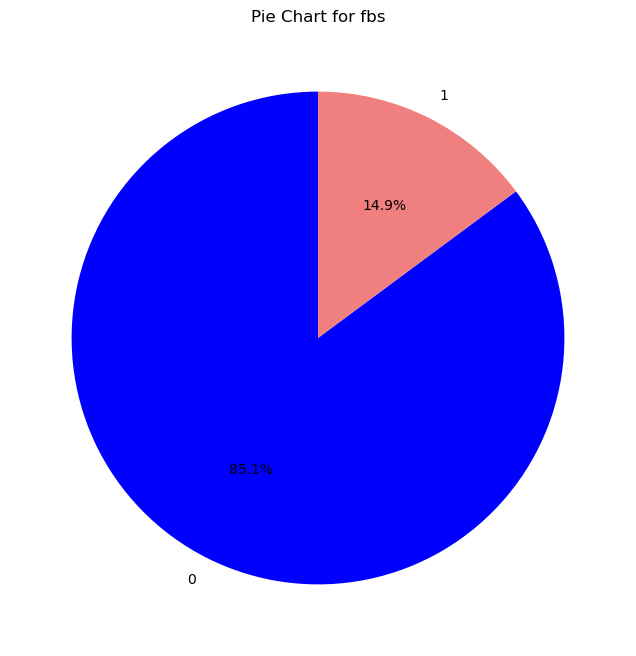

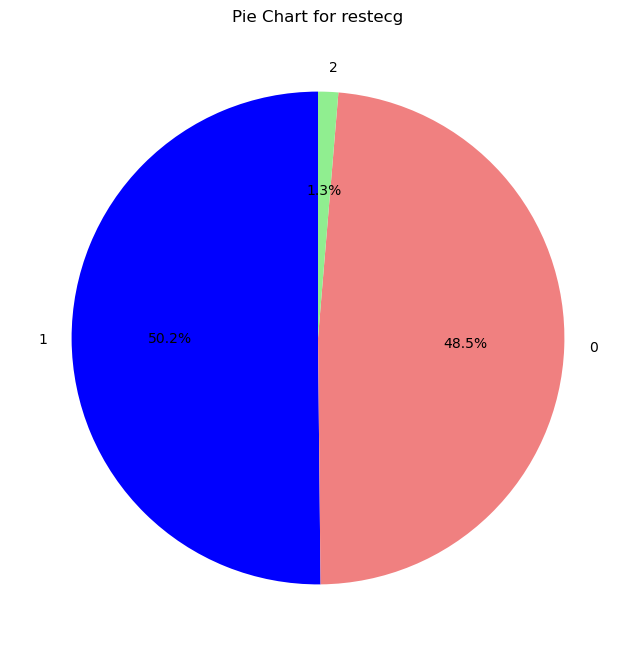

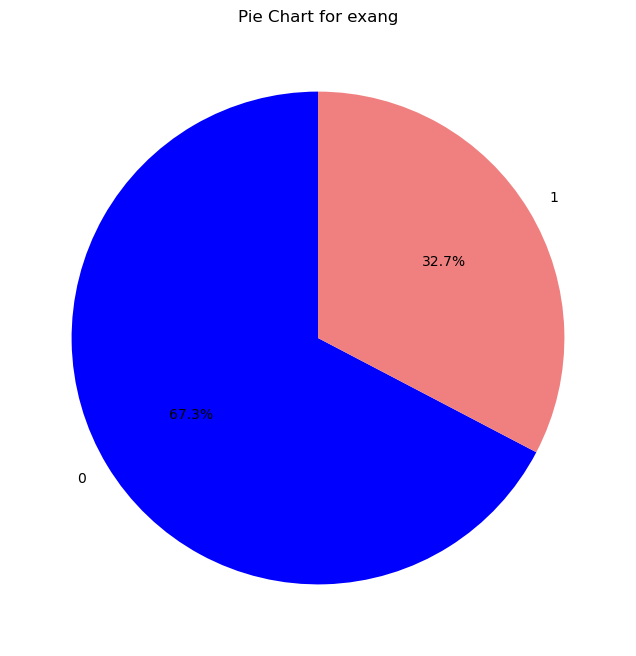

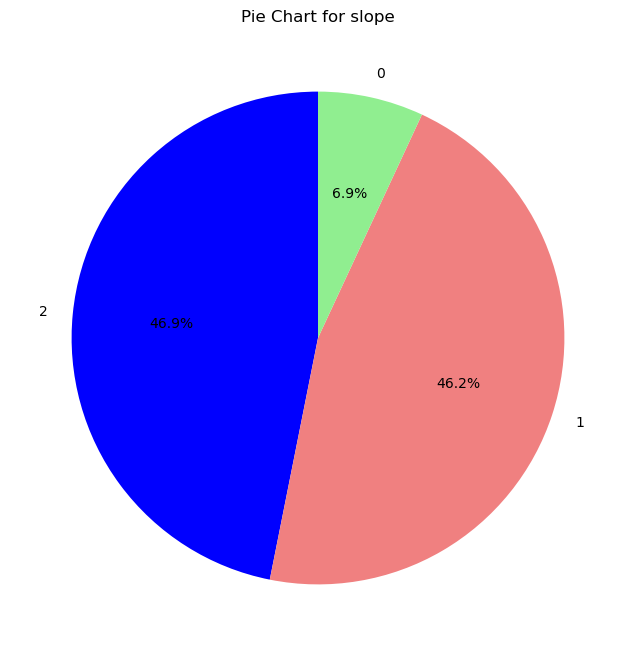

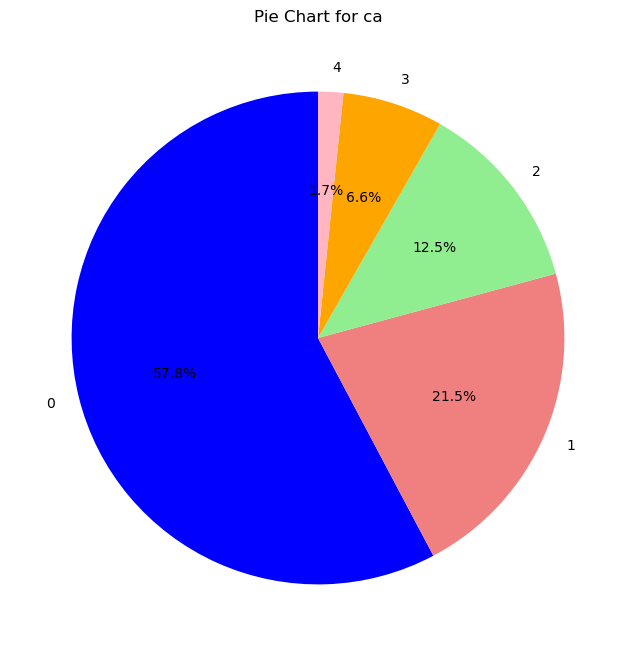

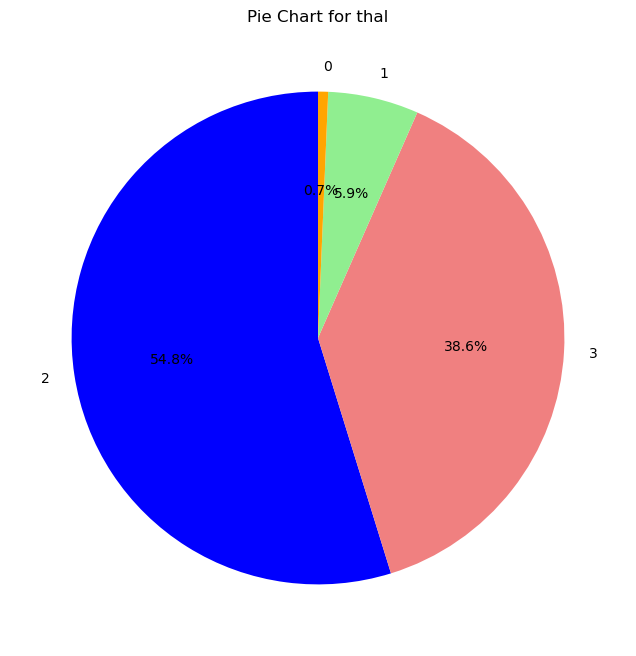

In [44]:
# Creating pie charts for each categorical column
for column in categorical_columns:
    create_pie_chart(column)

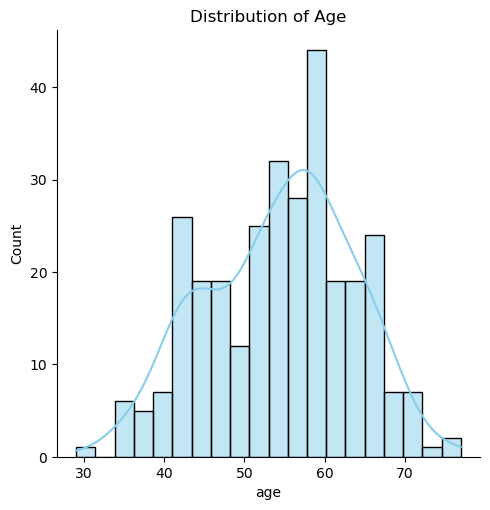

In [39]:
# Distribution plot for a single variable (e.g., 'age')
sns.displot(df['age'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Age')
plt.show()


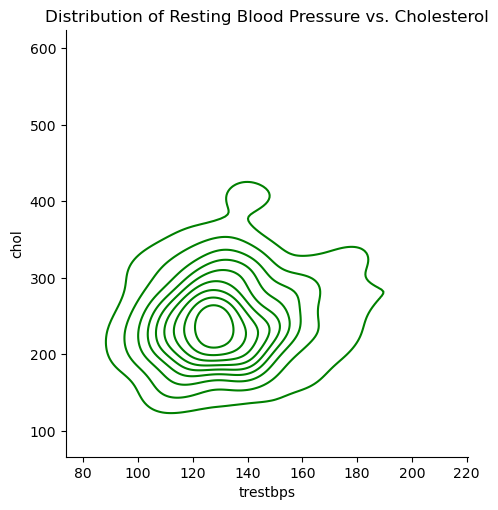

In [40]:
# Distribution plot for two variables (e.g., 'trestbps' and 'chol')
sns.displot(x='trestbps', y='chol', data=df, kind='kde', color='green')
plt.title('Distribution of Resting Blood Pressure vs. Cholesterol')
plt.show()

# Splitting the Features and Target

In [21]:
X = df.drop('target', axis=1)
y = df['target']

In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardizing features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Modelling using Machine Learning

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [25]:
print(f'Accuracy - Logistic Regression: {accuracy_logreg:.4f}')

Accuracy - Logistic Regression: 0.8525


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [27]:
print(f'Accuracy - Decision Tree: {accuracy_dt:.4f}')

Accuracy - Decision Tree: 0.7541


# Random Tree Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [29]:
print(f'Accuracy - Random Forest: {accuracy_rf:.4f}')

Accuracy - Random Forest: 0.8361


# Support Vector Machine(SVM)

In [30]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [32]:
print(f'Accuracy - SVM: {accuracy_svm:.4f}')

Accuracy - SVM: 0.8689


# Visualization of accuracy in bar graph and confusion matrix in heatmap

In [33]:
# Function to plot confusion matrix with heatmap
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Set3', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

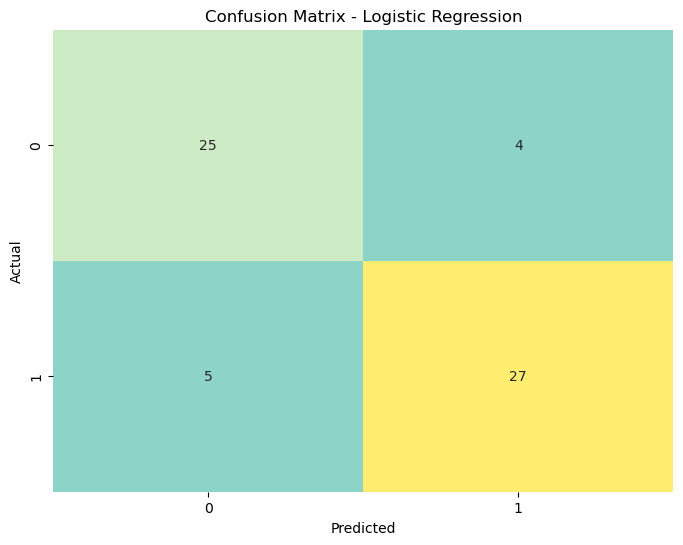

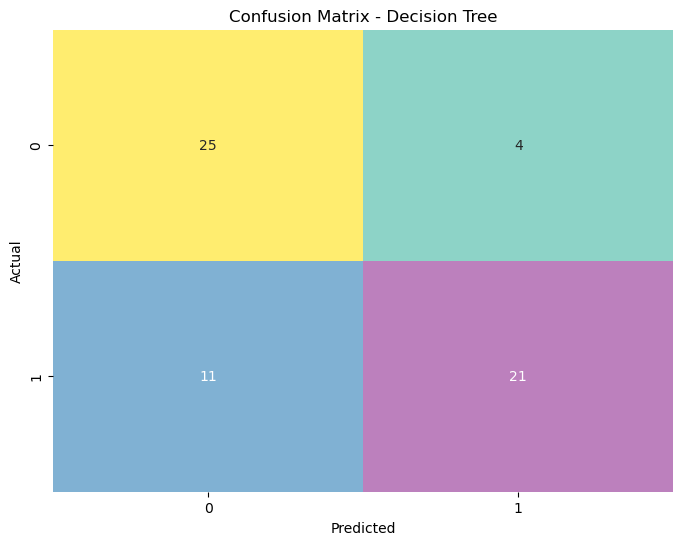

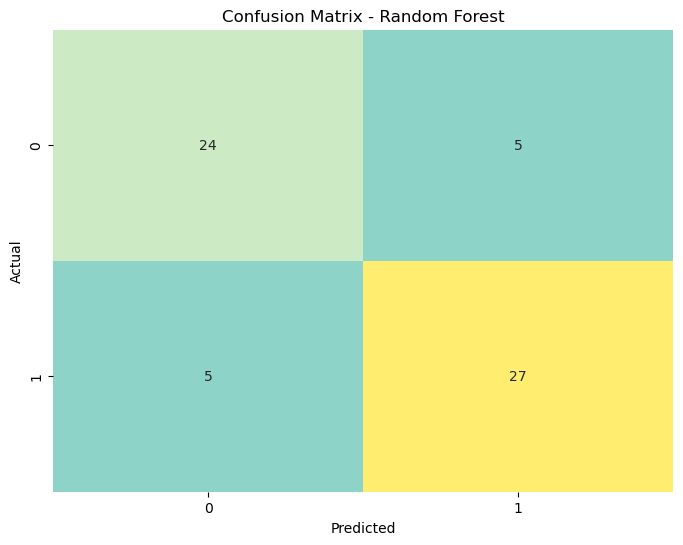

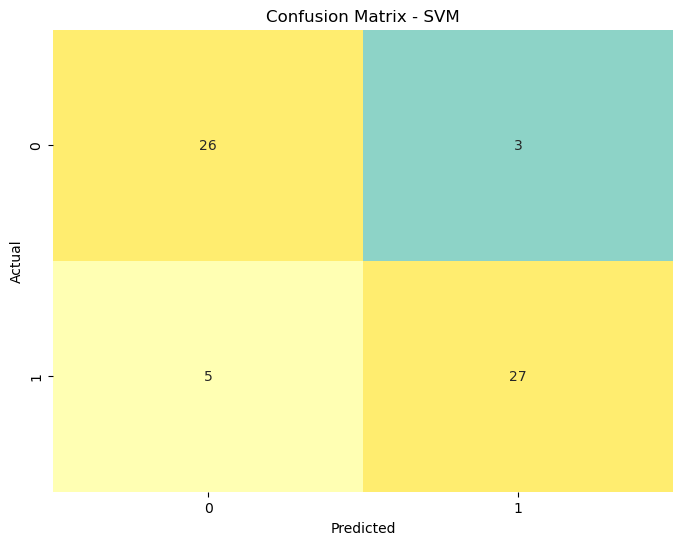

In [34]:
plot_confusion_matrix(y_test, y_pred_logreg, 'Confusion Matrix - Logistic Regression')
plot_confusion_matrix(y_test, y_pred_dt, 'Confusion Matrix - Decision Tree')
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')
plot_confusion_matrix(y_test, y_pred_svm, 'Confusion Matrix - SVM')

In [35]:
accuracies = [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_svm]
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

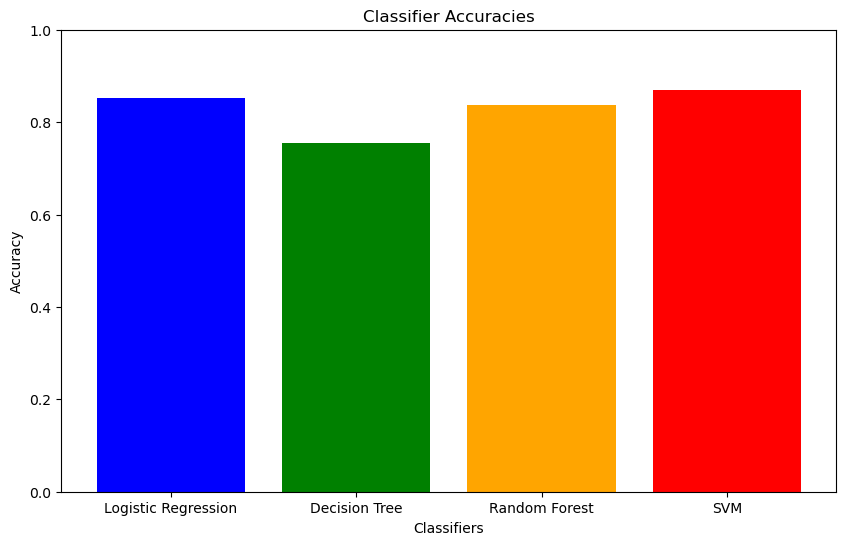

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Classifier Accuracies')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.show()

In [37]:
print(f'Accuracy - Logistic Regression: {accuracy_logreg:.4f}')
print(f'Accuracy - Decision Tree: {accuracy_dt:.4f}')
print(f'Accuracy - Random Forest: {accuracy_rf:.4f}')
print(f'Accuracy - SVM: {accuracy_svm:.4f}')

Accuracy - Logistic Regression: 0.8525
Accuracy - Decision Tree: 0.7541
Accuracy - Random Forest: 0.8361
Accuracy - SVM: 0.8689


In [38]:
import pickle

In [39]:
with open('logreg_model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)

with open('dt_model.pkl', 'wb') as model_file:
    pickle.dump(dt_classifier, model_file)

with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_classifier, model_file)